In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv("/Users/tejastammewar/Desktop/powerconsumption-1.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [4]:
df.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [5]:
df.shape

(52416, 9)

In [6]:
print("column-wise null values:\n")
print(df.isnull().sum())

column-wise null values:

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64


In [7]:
df.dtypes

Datetime                   object
Temperature               float64
Humidity                  float64
WindSpeed                 float64
GeneralDiffuseFlows       float64
DiffuseFlows              float64
PowerConsumption_Zone1    float64
PowerConsumption_Zone2    float64
PowerConsumption_Zone3    float64
dtype: object

In [8]:
for col in df.select_dtypes(include="object"):
    print(f"Unique values in {col}: {df[col].unique()}")


Unique values in Datetime: ['2017-01-01 00:00:00' '2017-01-01 00:10:00' '2017-01-01 00:20:00' ...
 '2017-12-30 23:30:00' '2017-12-30 23:40:00' '2017-12-30 23:50:00']


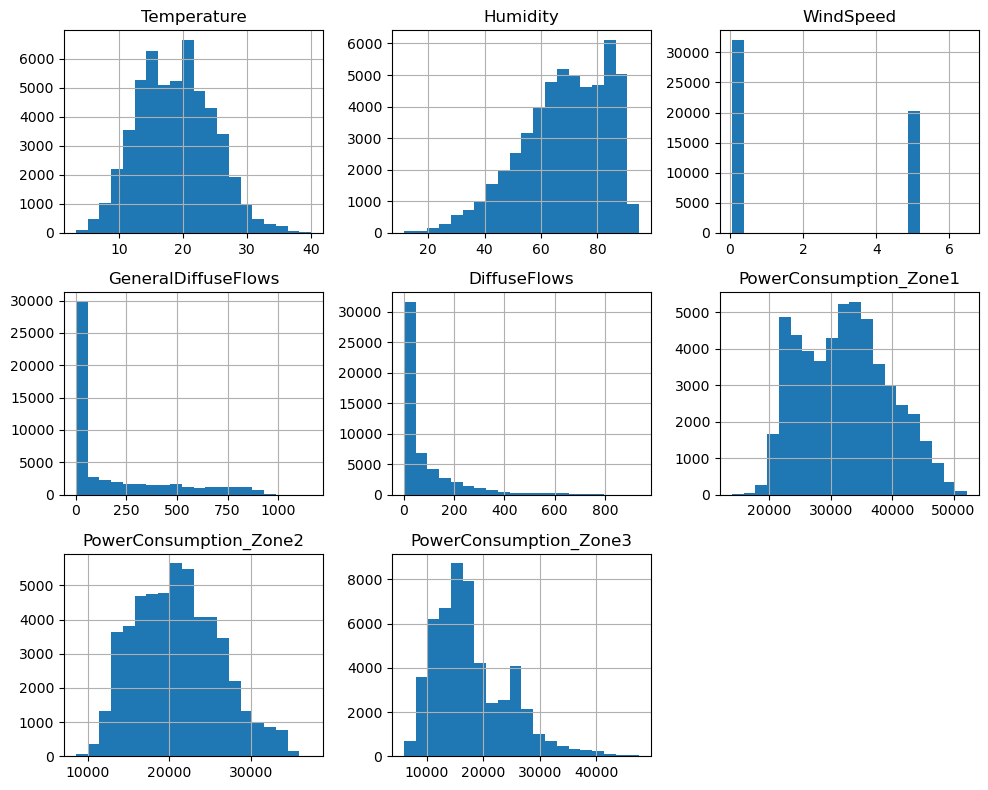

In [9]:
# Distribution of numerical variables
df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

In [10]:
# Identifying non-numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Filling missing values only for numeric columns using their mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
Temperature_Binned        1
dtype: int64
              Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0  2017-01-01 00:00:00        6.559      73.8      0.083                0.051   
1  2017-01-01 00:10:00        6.414      74.5      0.083                0.070   
2  2017-01-01 00:20:00        6.313      74.5      0.080                0.062   
3  2017-01-01 00:30:00        6.121      75.0      0.083                0.091   
4  2017-01-01 00:40:00        5.921      75.7      0.081                0.048   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0         0.119             34055.69620             16128.87538   
1         0.085             29814.68354             19375.07599   
2         0.100    

/var/folders/r_/xpqpg2151rg15r2lh34224d00000gp/T/ipykernel_1891/3852195753.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Temperature'].fillna(df['Temperature'].mean(), inplace=True)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(gro

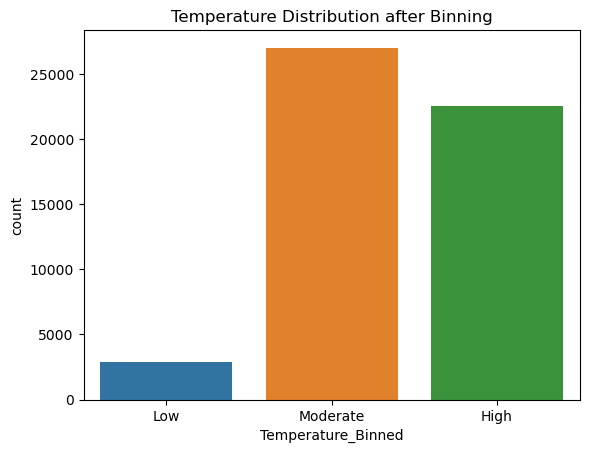

In [11]:
# Removing duplicate rows
df = df.drop_duplicates()

# Replacing invalid or outlier values in 'Temperature' (example: negative values)
df['Temperature'] = df['Temperature'].apply(lambda x: np.nan if x < 0 else x)
df['Temperature'].fillna(df['Temperature'].mean(), inplace=True)

# Binning Temperature into categories: 'Low', 'Moderate', 'High'
bins = [df['Temperature'].min(), 10, 20, df['Temperature'].max()]
labels = ['Low', 'Moderate', 'High']
df['Temperature_Binned'] = pd.cut(df['Temperature'], bins=bins, labels=labels)

# Checking for missing values
print(df.isnull().sum())

# Displaying first few rows
print(df.head())

import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of temperature bins
sns.countplot(data=df, x='Temperature_Binned')
plt.title('Temperature Distribution after Binning')
plt.show()



In [12]:
import pandas as pd
print(pd.__version__)


2.2.3


In [13]:
pip install --upgrade pandas


Note: you may need to restart the kernel to use updated packages.


In [14]:
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Temperature_Binned
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,Low
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,Low
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,Low
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,Low
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,Low


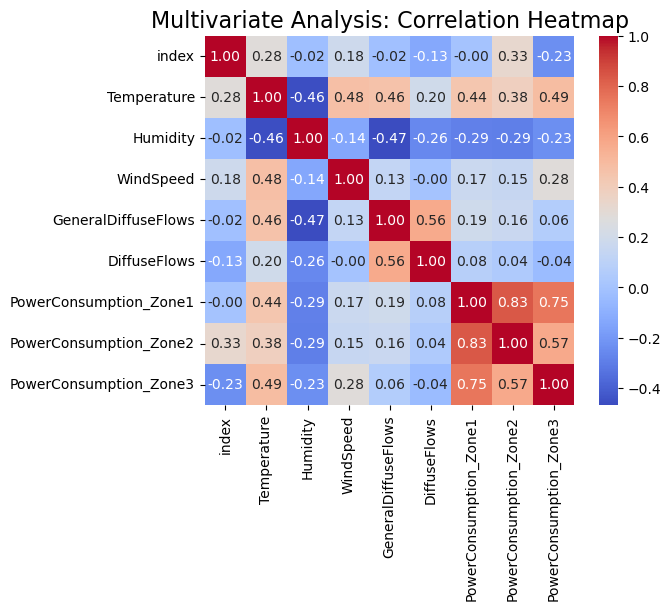

In [15]:
# Reset index to make 'Datetime' a regular column
df_reset = df.reset_index()

# Correlation matrix and heatmap
correlation_matrix = df_reset.drop(columns=['Datetime']).select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Multivariate Analysis: Correlation Heatmap", fontsize=16)
plt.show()


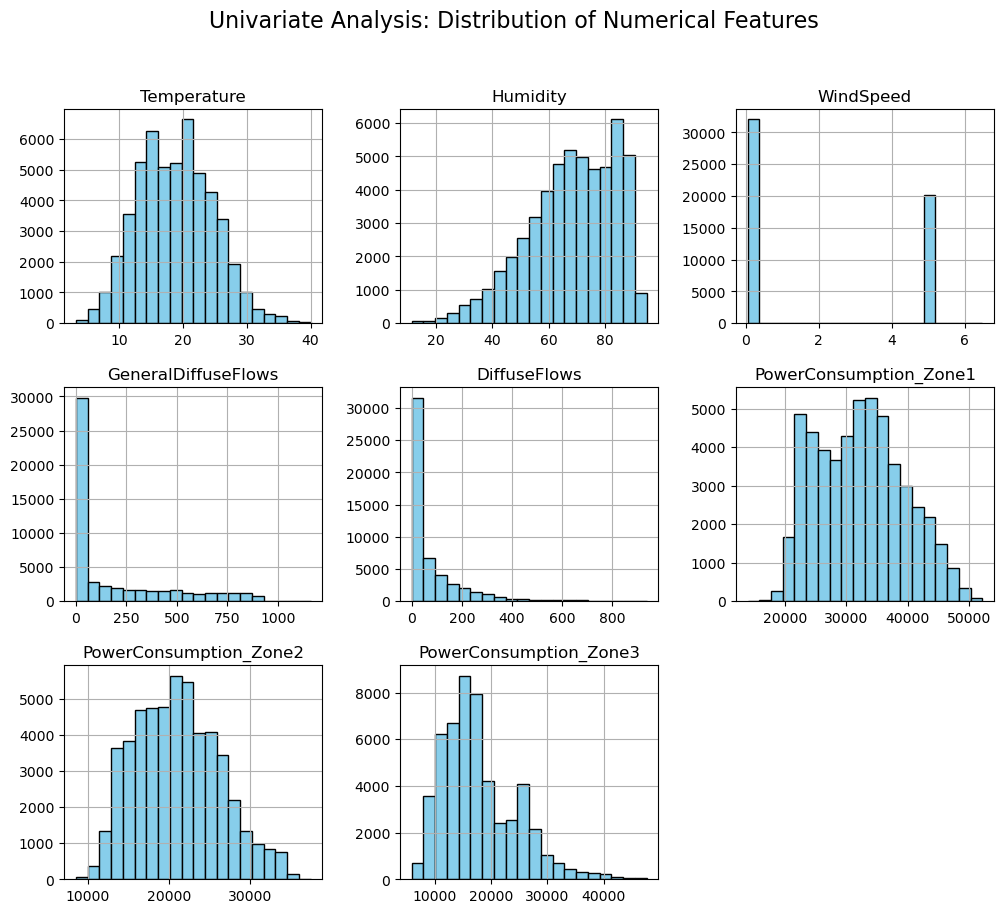

In [16]:
# Univariate analysis: Histograms for numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Univariate Analysis: Distribution of Numerical Features", fontsize=16)
plt.show()







In [18]:
# Generating summary statistics for numeric columns
summary_stats = df.describe()
print(summary_stats)


        Temperature      Humidity     WindSpeed  GeneralDiffuseFlows  \
count  52416.000000  52416.000000  52416.000000         52416.000000   
mean      18.810024     68.259518      1.959489           182.696614   
std        5.815476     15.551177      2.348862           264.400960   
min        3.247000     11.340000      0.050000             0.004000   
25%       14.410000     58.310000      0.078000             0.062000   
50%       18.780000     69.860000      0.086000             5.035500   
75%       22.890000     81.400000      4.915000           319.600000   
max       40.010000     94.800000      6.483000          1163.000000   

       DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
count  52416.000000            52416.000000            52416.000000   
mean      75.028022            32344.970564            21042.509082   
std      124.210949             7130.562564             5201.465892   
min        0.011000            13895.696200             8560.081466

1-D Statistical Data Analysis


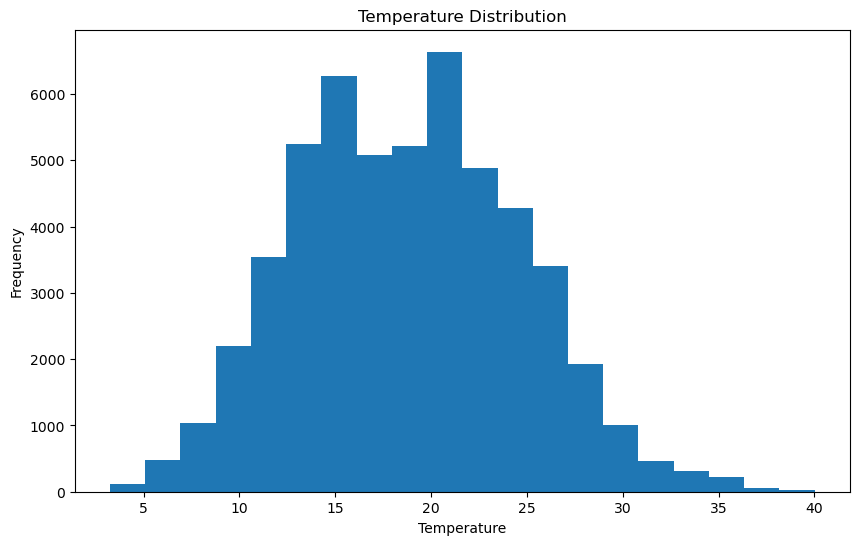

2-D Statistical Data Analysis


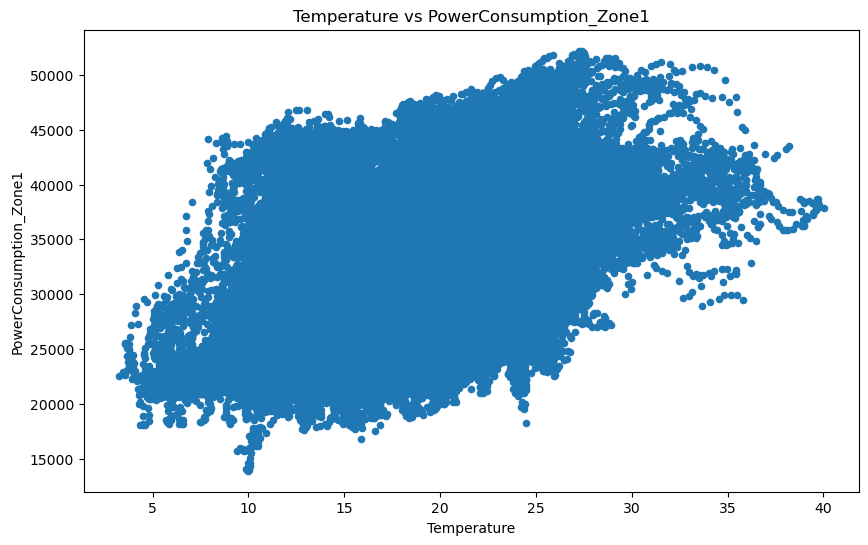

                        Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
Temperature                1.000000 -0.460243   0.477109             0.460294   
Humidity                  -0.460243  1.000000  -0.135853            -0.468138   
WindSpeed                  0.477109 -0.135853   1.000000             0.133733   
GeneralDiffuseFlows        0.460294 -0.468138   0.133733             1.000000   
DiffuseFlows               0.196522 -0.256886  -0.000972             0.564718   
PowerConsumption_Zone1     0.440221 -0.287421   0.167444             0.187965   
PowerConsumption_Zone2     0.382428 -0.294961   0.146413             0.157223   
PowerConsumption_Zone3     0.489527 -0.233022   0.278641             0.063376   

                        DiffuseFlows  PowerConsumption_Zone1  \
Temperature                 0.196522                0.440221   
Humidity                   -0.256886               -0.287421   
WindSpeed                  -0.000972                0.167444   
GeneralDiffuse

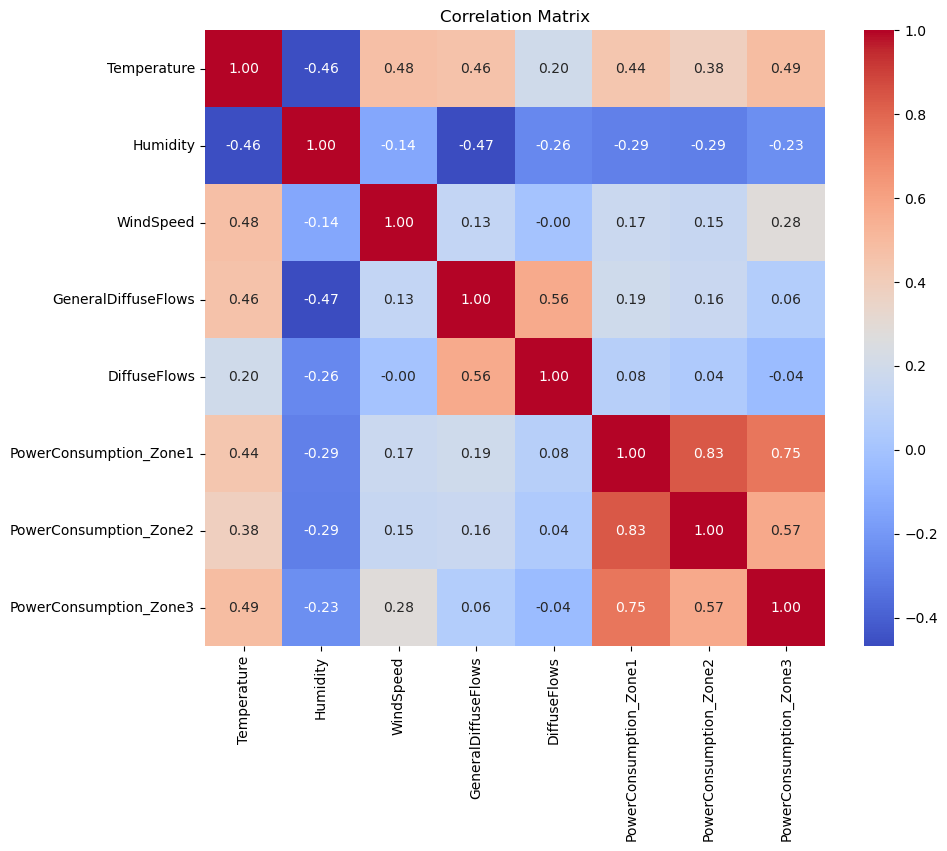

                            Temperature  Humidity  WindSpeed  \
Temperature                    1.000000 -0.460243   0.477109   
Humidity                      -0.460243  1.000000  -0.135853   
WindSpeed                      0.477109 -0.135853   1.000000   
GeneralDiffuseFlows            0.460294 -0.468138   0.133733   
DiffuseFlows                   0.196522 -0.256886  -0.000972   
PowerConsumption_Zone1         0.440221 -0.287421   0.167444   
PowerConsumption_Zone2         0.382428 -0.294961   0.146413   
PowerConsumption_Zone3         0.489527 -0.233022   0.278641   
Temperature_Binned_Encoded    -0.730101  0.297960  -0.410374   

                            GeneralDiffuseFlows  DiffuseFlows  \
Temperature                            0.460294      0.196522   
Humidity                              -0.468138     -0.256886   
WindSpeed                              0.133733     -0.000972   
GeneralDiffuseFlows                    1.000000      0.564718   
DiffuseFlows                      

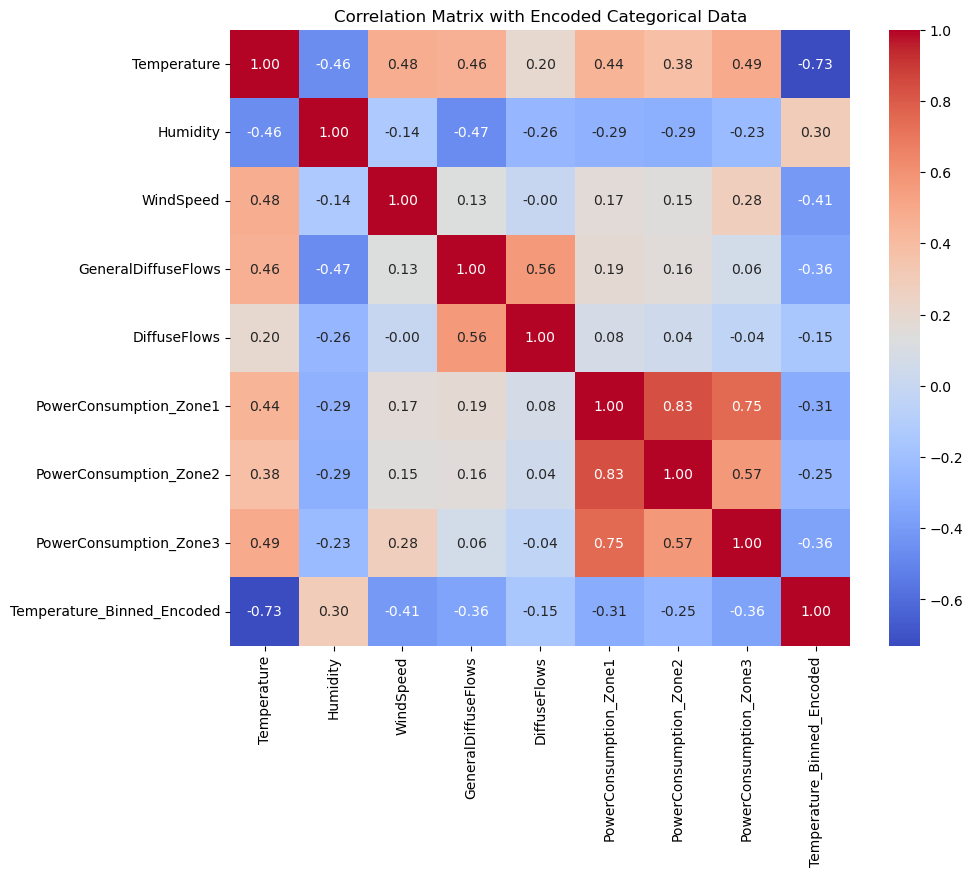

In [19]:
# Summary of a single column (e.g., Temperature)
print("1-D Statistical Data Analysis")
temperature_summary = df['Temperature'].describe()

# Plotting histogram for Temperature
df['Temperature'].plot(kind='hist', bins=20, figsize=(10, 6), title="Temperature Distribution")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

print("2-D Statistical Data Analysis")
# Summary statistics for Temperature and PowerConsumption_Zone1
temperature_power_summary = df[['Temperature', 'PowerConsumption_Zone1']].describe()

# Scatter plot to show the relationship between Temperature and Power Consumption (Zone 1)
df.plot(kind='scatter', x='Temperature', y='PowerConsumption_Zone1', figsize=(10, 6), title="Temperature vs PowerConsumption_Zone1")
plt.xlabel("Temperature")
plt.ylabel("PowerConsumption_Zone1")
plt.show()

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# Visualizing the correlation matrix with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

from sklearn.preprocessing import LabelEncoder

# Encoding categorical column 'Temperature_Binned'
label_encoder = LabelEncoder()
df['Temperature_Binned_Encoded'] = label_encoder.fit_transform(df['Temperature_Binned'])

# Select numeric columns again
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix with Encoded Categorical Data")
plt.show()


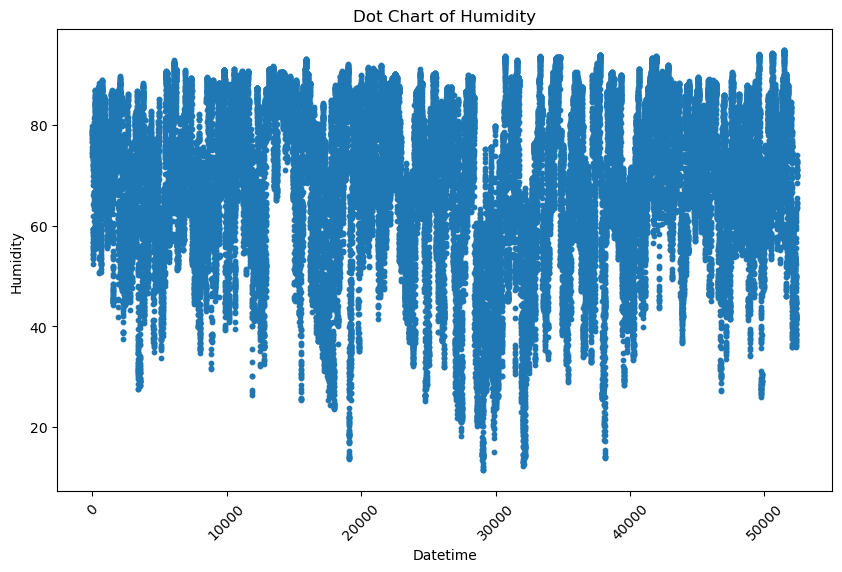

In [20]:
import matplotlib.pyplot as plt

# Scatter plot for Humidity with Datetime as x-axis
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Humidity'], s=10)  # Use scatter plot with Datetime index on x-axis
plt.title("Dot Chart of Humidity")
plt.xlabel("Datetime")
plt.ylabel("Humidity")
plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlap
plt.show()


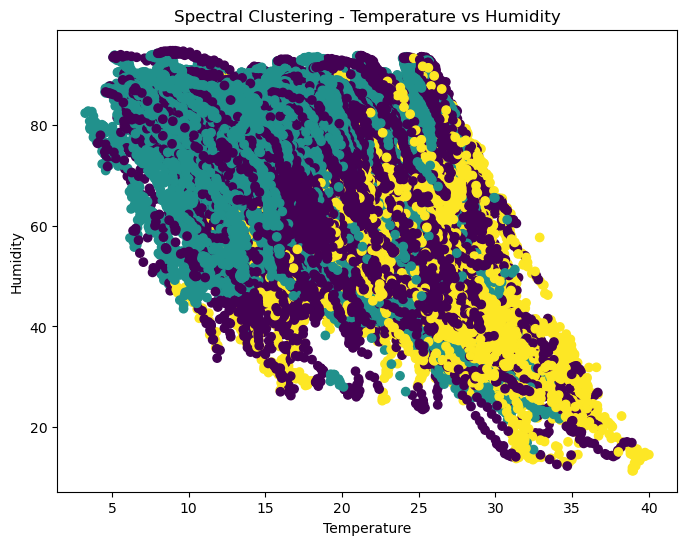

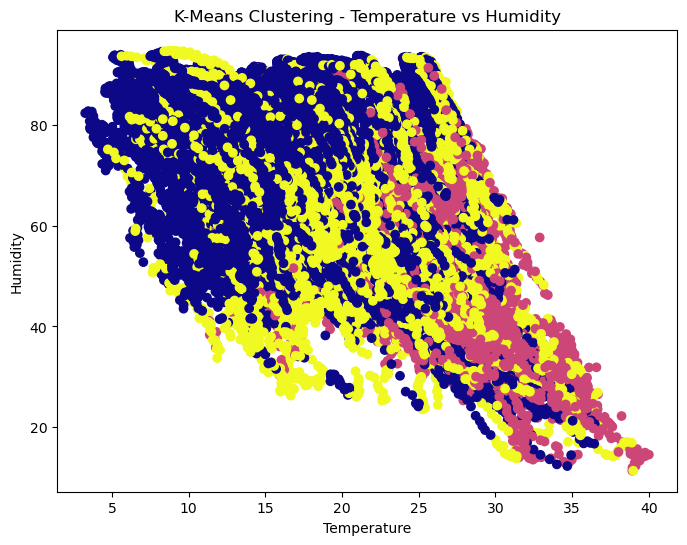

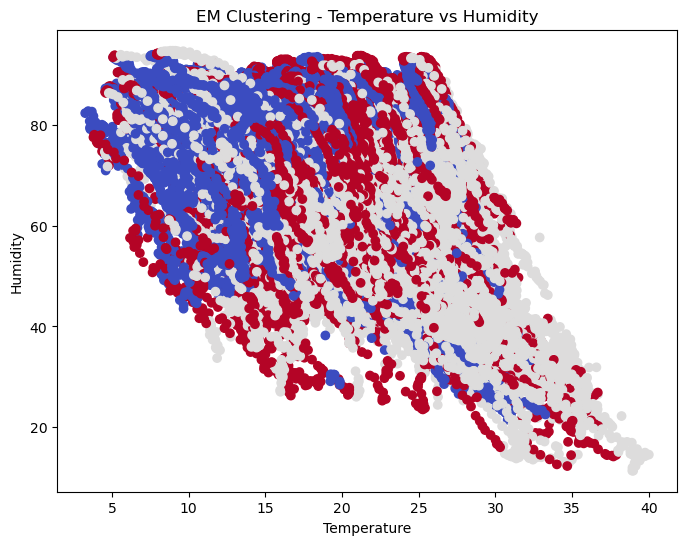

Outliers detected by KMeans:
       Temperature  Humidity
61           5.836     71.30
62           5.996     69.85
63           6.220     68.81
64           6.703     68.01
65           6.993     66.14
...            ...       ...
52369       14.280     41.56
52370       14.320     40.45
52371       14.210     41.22
52372       14.260     42.42
52373       14.150     41.15

[10470 rows x 2 columns]


In [21]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import numpy as np

# Select relevant columns for clustering (using 'Temperature', 'Humidity', etc.)
data_for_clustering = df[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows']]

# 1. Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
df['Spectral_Cluster'] = spectral.fit_predict(data_for_clustering)
# Plotting the Spectral Clustering result
plt.figure(figsize=(8, 6))
plt.scatter(df['Temperature'], df['Humidity'], c=df['Spectral_Cluster'], cmap='viridis')
plt.title('Spectral Clustering - Temperature vs Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

# 2. K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(data_for_clustering)
# Plotting the KMeans result
plt.figure(figsize=(8, 6))
plt.scatter(df['Temperature'], df['Humidity'], c=df['KMeans_Cluster'], cmap='plasma')
plt.title('K-Means Clustering - Temperature vs Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

# 3. Expectation-Maximization (EM) Model-based Clustering
gmm = GaussianMixture(n_components=3, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(data_for_clustering)
# Plotting the EM Clustering result
plt.figure(figsize=(8, 6))
plt.scatter(df['Temperature'], df['Humidity'], c=df['GMM_Cluster'], cmap='coolwarm')
plt.title('EM Clustering - Temperature vs Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

# 4. Outlier Detection using KMeans
kmeans_outliers = KMeans(n_clusters=3, random_state=42)
df['KMeans_Outlier'] = kmeans_outliers.fit_predict(data_for_clustering)
# Detecting outliers as points far from the cluster centroids
outliers = df[df['KMeans_Outlier'] == 2]  # Change the cluster number if needed
print("Outliers detected by KMeans:")
print(outliers[['Temperature', 'Humidity']])


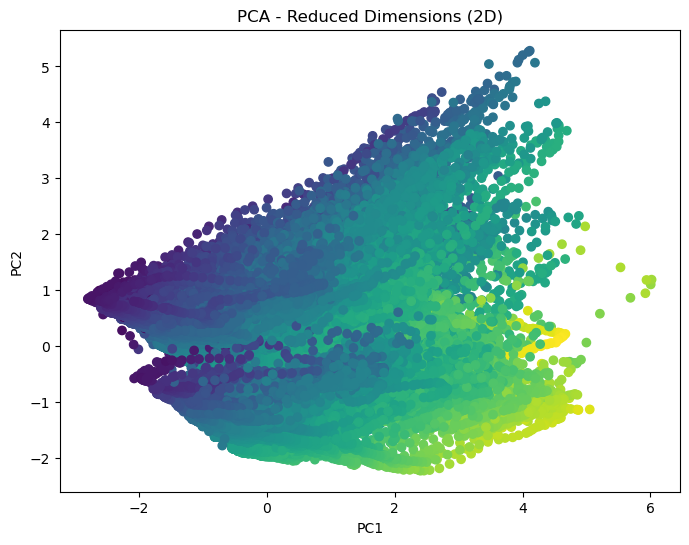

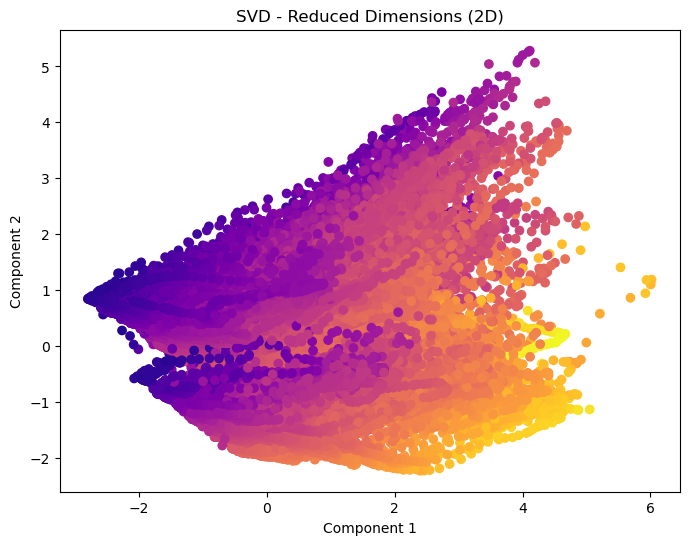

In [22]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom
import matplotlib.pyplot as plt

# Standardize data for dimensionality reduction
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows']])

# 1. Principal Component Analysis (PCA)
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
pca_result = pca.fit_transform(scaled_data)

# Plotting PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Temperature'], cmap='viridis')
plt.title('PCA - Reduced Dimensions (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# 2. Singular Value Decomposition (SVD)
svd = PCA(n_components=2)  # SVD is a form of PCA
svd_result = svd.fit_transform(scaled_data)

# Plotting SVD result
plt.figure(figsize=(8, 6))
plt.scatter(svd_result[:, 0], svd_result[:, 1], c=df['Temperature'], cmap='plasma')
plt.title('SVD - Reduced Dimensions (2D)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()




In [ ]:
pip install minisom


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features and target variable
X = df[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows']]
y = df['PowerConsumption_Zone1']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Squared Error: 39842406.21828706
R-squared: 0.21095375041913278
